In [21]:
# 의사결정트리 모델
from sklearn.tree import DecisionTreeClassifier
# 데이터셋 분리 함수
from sklearn.model_selection import train_test_split
import pandas as pd

In [22]:
machine_data = pd.read_csv('/content/machine_failure.csv')

In [23]:
machine_data.head()

,id,type,temp_air,temp_process,speed,torque,tool_wear,is_failure
0,14860,M,298.1,308.6,1551,42.8,0,0
1,47181,L,298.2,308.7,1408,46.3,3,0
2,47182,L,298.1,308.5,1498,49.4,5,0
3,47183,L,298.2,308.6,1433,39.5,7,0
4,47184,L,298.2,308.7,1408,40.0,9,0


In [24]:
machine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9982 non-null   int64  
 1   type          9982 non-null   object 
 2   temp_air      9982 non-null   float64
 3   temp_process  9982 non-null   float64
 4   speed         9982 non-null   int64  
 5   torque        9982 non-null   float64
 6   tool_wear     9982 non-null   int64  
 7   is_failure    9982 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 624.0+ KB


In [25]:
df_x_data = machine_data.drop(['is_failure'],axis=1)
df_x_data = pd.get_dummies(df_x_data)

df_y_data = machine_data['is_failure']

In [26]:
df_x_data

,id,temp_air,temp_process,speed,torque,tool_wear,type_H,type_L,type_M
0,14860,298.1,308.6,1551,42.8,0,False,False,True
1,47181,298.2,308.7,1408,46.3,3,False,True,False
2,47182,298.1,308.5,1498,49.4,5,False,True,False
3,47183,298.2,308.6,1433,39.5,7,False,True,False
4,47184,298.2,308.7,1408,40.0,9,False,True,False
...,...,...,...,...,...,...,...,...,...
9977,24855,298.8,308.4,1604,29.5,14,False,False,True
9978,39410,298.9,308.4,1632,31.8,17,True,False,False
9979,24857,299.0,308.6,1645,33.4,22,False,False,True
9980,39412,299.0,308.7,1408,48.5,25,True,False,False


In [27]:
df_y_data

0       0
1       0
2       0
3       0
4       0
       ..
9977    0
9978    0
9979    0
9980    0
9981    0
Name: is_failure, Length: 9982, dtype: int64

In [28]:
# 데이터셋의 20%를 테스트 데이터로 사용
X_train, X_test, y_train, y_test = train_test_split(
    df_x_data,
    df_y_data,
    test_size=0.2,
    random_state=11,
    stratify=df_y_data
)


In [29]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [30]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9760


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [33]:
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개
scores = cross_val_score(dt_clf , df_x_data , df_y_data ,scoring='accuracy',cv=5)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.9735 0.9685 0.3527 0.9704 0.9729]
평균 검증 정확도: 0.8476


In [34]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

# 교차 검증 수행
scores = cross_val_score(dt_clf, df_x_data, df_y_data, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Accuracy Scores: [0.98147221 0.98297446 0.97995992 0.98296593 0.98396794]
Mean Accuracy: 0.9822680915160316
Standard Deviation: 0.0014026045324327815


In [47]:
print(df_y_data.loc[df_y_data == 0].count())

9652


In [48]:
print(df_y_data.loc[df_y_data == 1].count())

330


In [35]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot_data = export_graphviz(dt_clf, out_file=None,
                           feature_names=df_x_data.columns,
                           class_names=True,
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [36]:
from sklearn.model_selection import GridSearchCV



# 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 수행
best_dt_clf = grid_search.best_estimator_
y_pred = best_dt_clf.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Test set accuracy:  0.9784677015523285


In [37]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11, criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)
# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=11)

In [38]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9785


In [40]:
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개
scores = cross_val_score(dt_clf , df_x_data , df_y_data ,scoring='accuracy',cv=5)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.9825 0.975  0.3156 0.9755 0.979 ]
평균 검증 정확도: 0.8455


In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

# 교차 검증 수행
scores = cross_val_score(dt_clf, df_x_data, df_y_data, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Accuracy Scores: [0.98147221 0.98297446 0.98547094 0.98346693 0.98196393]
Mean Accuracy: 0.9830696947224444
Standard Deviation: 0.0013933800193716157


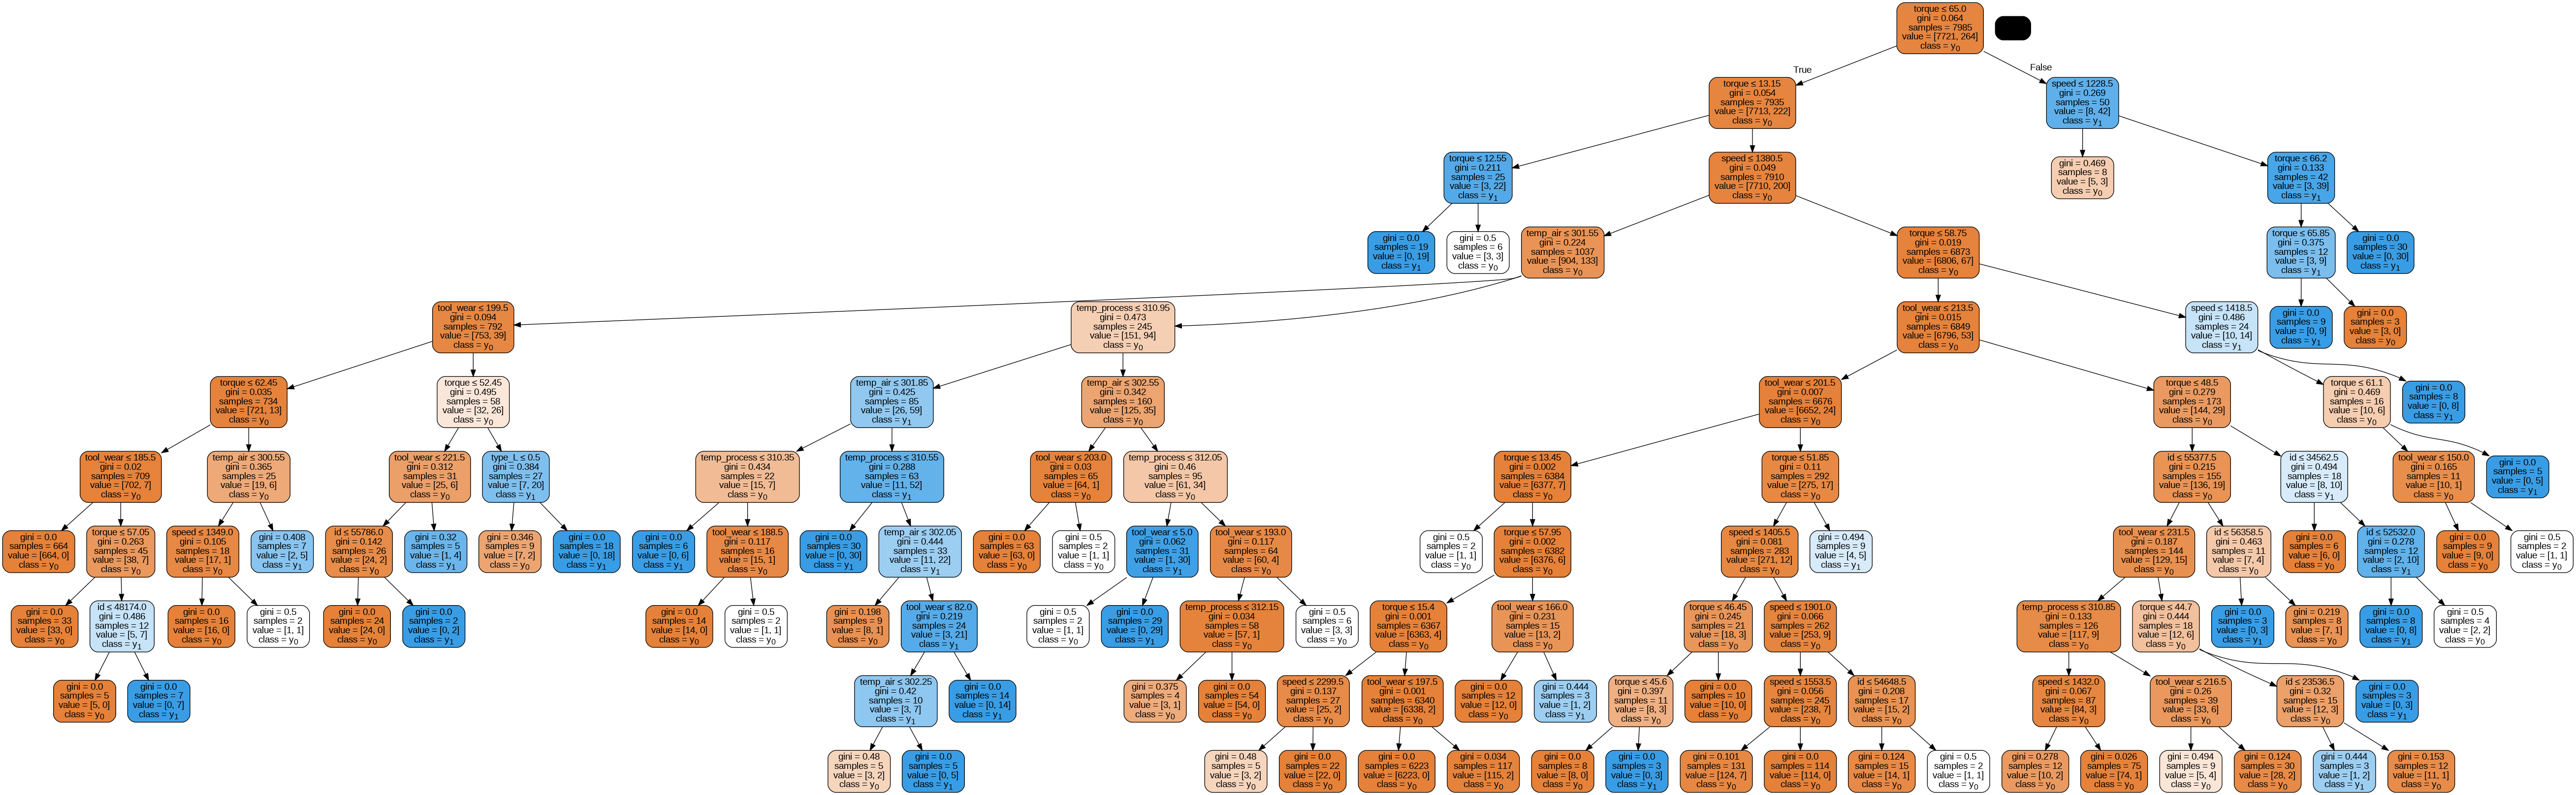

In [42]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot_data = export_graphviz(dt_clf, out_file=None,
                           feature_names=df_x_data.columns,
                           class_names=True,
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())